# Adaptive Learning Rate
`helper.py`에는 아래와 같은 함수들이 들어있습니다.

1. Gradient
1. Newton
1. BFGS
1. Nelder-Mead
1. Moment
1. Nesterov Moment
1. Adagrad
1. RMSprop
1. Adam

이번 실습에서는 Moment Algorithm, Nesterov Momentum과 RmsProp에 빈칸을 채워 동작하도록 할 것입니다.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

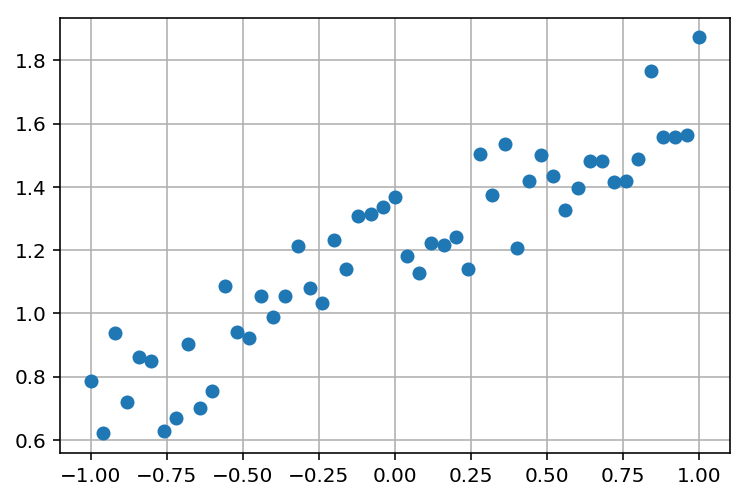

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [3]:
def loss(w, x_list, y_list):
    N = len(x_list)
    val = 0.0
    for i in range(N):
        val += (w[0] * x_list[i] + w[1] - y_list[i])**2 / N
    return val

In [4]:
def grad_loss(w, x_list, y_list):
    N = len(x_list)
    val = np.array([0.0, 0.0])
    for i in range(N):
        er = w[0] * x_list[i] + w[1] - y_list[i]
        val += 2.0 * er * np.array([x_list[i], 1.0]) / N
    return val

## Moment Algorithm
Let $v_0 = \vec{0}$, $\alpha = 0.9$, and $\epsilon=0.01$. For $k=1,2,3,\cdots,$, 
\begin{align}
v_{k+1} & = \alpha v_{k} - \epsilon \nabla f(x_k)\\
x_{k+1} &= x_k + v_{k} 
\end{align}

1. $\nabla f(x_k)$ 계산하기
1. $v_{k+1} = \alpha v_{k} - \epsilon \nabla f(x_k)$ 계산하기

In [5]:
def momentum_method(grad_func, x_set, y_set, w0,
                    learning_rate=0.01, alpha=0.9, MaxIter=10):
    epsilon = learning_rate
    velocity = np.zeros_like(w0)
    for i in range(MaxIter):
        # TODO1
        grad = grad_loss(w0, x_set, y_set)
        # TODO2
        velocity = alpha * velocity - epsilon * grad
        w1 = w0 + velocity
        w0 = w1
    return w0

In [6]:
w0 = np.array([1.0, 1.0])
w_mm = momentum_method(grad_loss, x_train, y_train, w0, learning_rate=0.01, MaxIter=500)
print(w_mm)

[ 0.46698201  1.19499133]


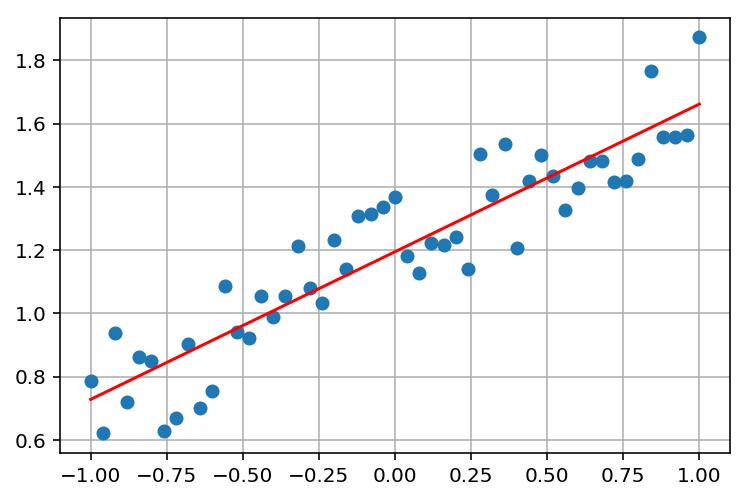

In [7]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_mm[0] * x_train + w_mm[1] , '-r')
plt.grid()
plt.show()

## Nesterov Moment Algorithm
Let $v_0 = \vec{0}$, $\alpha = 0.9$, and $\epsilon=0.01$. For $k=1,2,3,\cdots,$, 
\begin{align}
v_{k+1} & = \alpha v_{k} - \epsilon \nabla f(x_k+\alpha v_{k})\\
x_{k+1} &= x_k + v_{k+1} 
\end{align}

1. $\nabla f(x_k+\alpha v_{k})$ 계산하기
1. $v_{k+1} = \alpha v_{k} - \epsilon \nabla f(x_k+\alpha v_{k})$ 계산하기

In [8]:
def nesterov_method(grad_func, x_set, y_set, w0,
                    learning_rate=0.01, alpha=0.9, MaxIter=10):
    epsilon = learning_rate
    velocity = np.zeros_like(w0)
    for i in range(MaxIter):
        # TODO1
        grad = grad_loss(w0 + alpha * velocity, x_set, y_set)
        # TODO2
        velocity = alpha * velocity - epsilon * grad
        w1 = w0 + velocity
        w0 = w1
    return w0

In [9]:
w0 = np.array([1.0, 1.0])
w_nmm = nesterov_method(grad_loss, x_train, y_train, w0, learning_rate=0.01, MaxIter=500)
print(w_nmm)

[ 0.46698201  1.19499133]


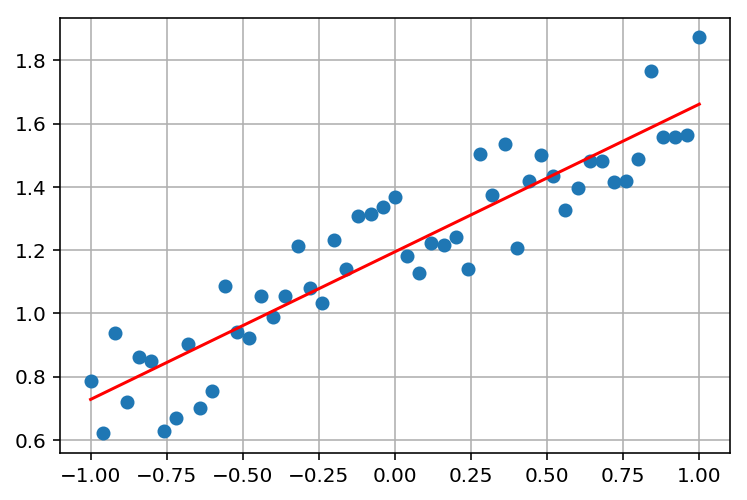

In [10]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_nmm[0] * x_train + w_nmm[1] , '-r')
plt.grid()
plt.show()

## Adagrad
Let $r_0 = \vec{0}$, $\delta = 10^{-7}$, and $\epsilon=0.01$. For $k=1,2,3,\cdots,$, 
\begin{align}
r_{k+1} & =  r_{k} + \nabla f(x_k) \odot   \nabla f(x_k)\\
\varDelta x_{k}  & = - \frac{\epsilon}{\delta + \sqrt{r_{k+1}}}\odot \nabla f(x_k) \\
x_{k+1} &= x_k + \varDelta x_{k} 
\end{align}

1. $\nabla f(x_k)$ 계산하기
1. $\varDelta x_{k}  = - \frac{\epsilon}{\delta + \sqrt{r_{k+1}}}\odot \nabla f(x_k)$ 계산하기

In [11]:
def adagrad_method(grad_func, x_set, y_set, w0,
                    learning_rate=1, delta=1E-7, MaxIter=10):
    epsilon = learning_rate
    r = np.zeros_like(w0)
    for i in range(MaxIter):
        # TODO1
        grad = grad_loss(w0, x_set, y_set)
        r = r  + grad * grad
        # TODO2
        delw = - epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1
    return w0

In [12]:
w0 = np.array([1.0, 1.0])
w_adag = adagrad_method(grad_loss, x_train, y_train, w0, MaxIter=500)
print(w_adag)

[ 0.46698201  1.19499133]


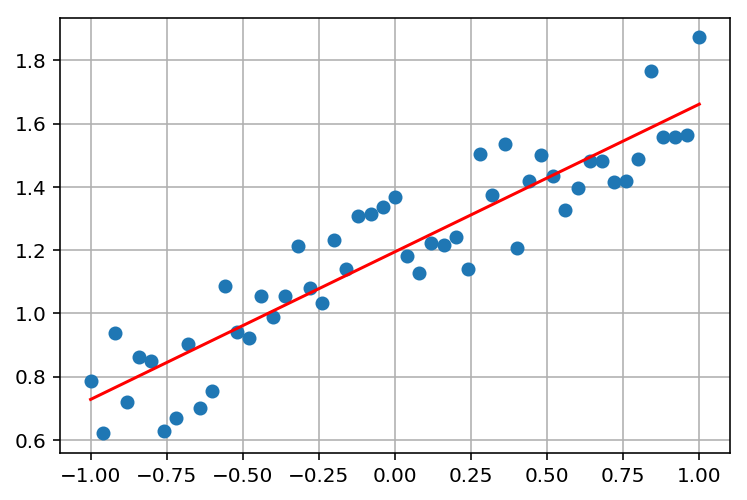

In [13]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_adag[0] * x_train + w_adag[1] , '-r')
plt.grid()
plt.show()

## RMSProp

Let $r_0 = \vec{0}$, $\delta = 10^{-7}$, and $\epsilon=0.01$. For $k=1,2,3,\cdots,$, 
\begin{align}
r_{k+1} & =  \rho r_{k} + (1-\rho)\nabla f(x_k) \odot   \nabla f(x_k)\\
\varDelta x_{k}  & = - \frac{\epsilon}{\sqrt{\delta + r_{k+1}}}\odot \nabla f(x_k) \\
x_{k+1} &= x_k + \varDelta x_{k} 
\end{align}

1. $r_{k+1}  =  \rho r_{k} + (1-\rho)\nabla f(x_k) \odot   \nabla f(x_k)$ 계산하기
1. $\varDelta x_{k}   = - \frac{\epsilon}{\sqrt{\delta + r_{k+1}}}\odot \nabla f(x_k)$ 계산하기

In [14]:
def rmsprop_method(grad_func, x_set, y_set, w0,
                    learning_rate=0.01, delta=1E-6, rho=0.9, MaxIter=10):
    epsilon = learning_rate
    r = np.zeros_like(w0)
    for i in range(MaxIter):
        grad = grad_func(w0, x_set, y_set)
        # TODO1
        r = rho * r  + (1 - rho) * (grad * grad)
        # TODO2
        delw = - epsilon  * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1
    return w0

In [15]:
w0 = np.array([1.0, 1.0])
w_adag = adagrad_method(grad_loss, x_train, y_train, w0, MaxIter=500)
print(w_adag)

[ 0.46698201  1.19499133]


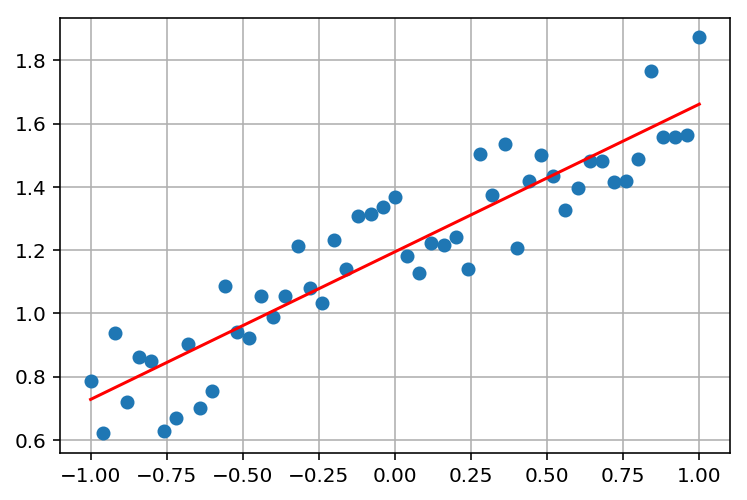

In [16]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, w_adag[0] * x_train + w_adag[1] , '-r')
plt.grid()
plt.show()